In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
archivo_csv = "df_limpio.csv"
df = pd.read_csv(archivo_csv)
df.head()

,Horas_Estudio,Asistencia,Involucramiento_Padres,Acceso_a_Recursos,Actividades_Extracurriculares,Horas_Sueño,Puntajes_Anteriores,Nivel_Motivacion,Acceso_a_Internet,Sesiones_Tutorias,Ingreso_Familiar,Calidad_Maestro,Tipo_Escuela,Influencias_Compañeros,Actividad_Fisica,Discapacidad_de_Aprendizaje,Nivel_Educacion_Padres,Distancia_Hogar,Genero,Puntaje_Examen
0,23.0,84.0,Baja,Desconocido,Desconocido,7.0,73.0,Baja,Desconocido,0.0,Baja,Media,Publica,Positivo,3.0,No,Preparatoria,Cerca,Masculino,0.0
1,19.0,64.0,Baja,Media,No,8.0,59.0,Baja,Si,2.0,Media,Media,Publica,Negativa,4.0,No,Universidad,Moderado,Femenino,61.0
2,24.0,0,Media,Media,Si,7.0,91.0,Media,Si,2.0,Media,Media,Publica,Neutral,4.0,No,Posgrado,Cerca,Masculino,74.0
3,29.0,89.0,Baja,Media,Si,8.0,98.0,Media,Si,1.0,Media,Media,Publica,Negativa,4.0,No,Preparatoria,Moderado,Masculino,71.0
4,19.0,92.0,Media,Media,Si,6.0,65.0,Media,Si,0,Media,Alta,Publica,Neutral,4.0,No,Universidad,Cerca,Femenino,70.0


In [54]:
columnas = [
    'Horas_Estudio', 'Asistencia','Horas_Sueño', 'Puntajes_Anteriores', 
    'Actividad_Fisica', 'Puntaje_Examen']

df[columnas] = df[columnas].apply(pd.to_numeric, errors='coerce')


In [46]:
numerical_columns = ['Horas_Estudio', 'Asistencia', 'Horas_Sueño', 
                     'Puntajes_Anteriores', 'Actividad_Fisica', 'Puntaje_Examen']

# Función para identificar outliers usando el IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Primer cuartil (percentil 25)
    Q3 = data[column].quantile(0.75)  # Tercer cuartil (percentil 75)
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detectar outliers en todas las columnas numéricas
outliers = {}
for col in numerical_columns:
    outliers[col] = detect_outliers_iqr(df, col)
    print(f"Valores atípicos en '{col}':")
    print(outliers[col], "\n")


Valores atípicos en 'Horas_Estudio':
      Horas_Estudio  Asistencia Involucramiento_Padres Acceso_a_Recursos  \
10              0.0        80.0                   Baja              Alta   
21              0.0        99.0                  Media              Alta   
55              0.0        88.0                  Media              Alta   
57              0.0        94.0                  Media             Media   
81              0.0        71.0                   Alta             Media   
...             ...         ...                    ...               ...   
6909           38.0        63.0                  Media              Alta   
6923            0.0        65.0                  Media              Alta   
6970            0.0        71.0                   Baja       Desconocido   
6973            0.0        82.0                  Media              Baja   
6975            0.0       100.0                   Baja             Media   

     Actividades_Extracurriculares  Horas_Sueño  P

In [47]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Reemplazar valores fuera de los límites
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


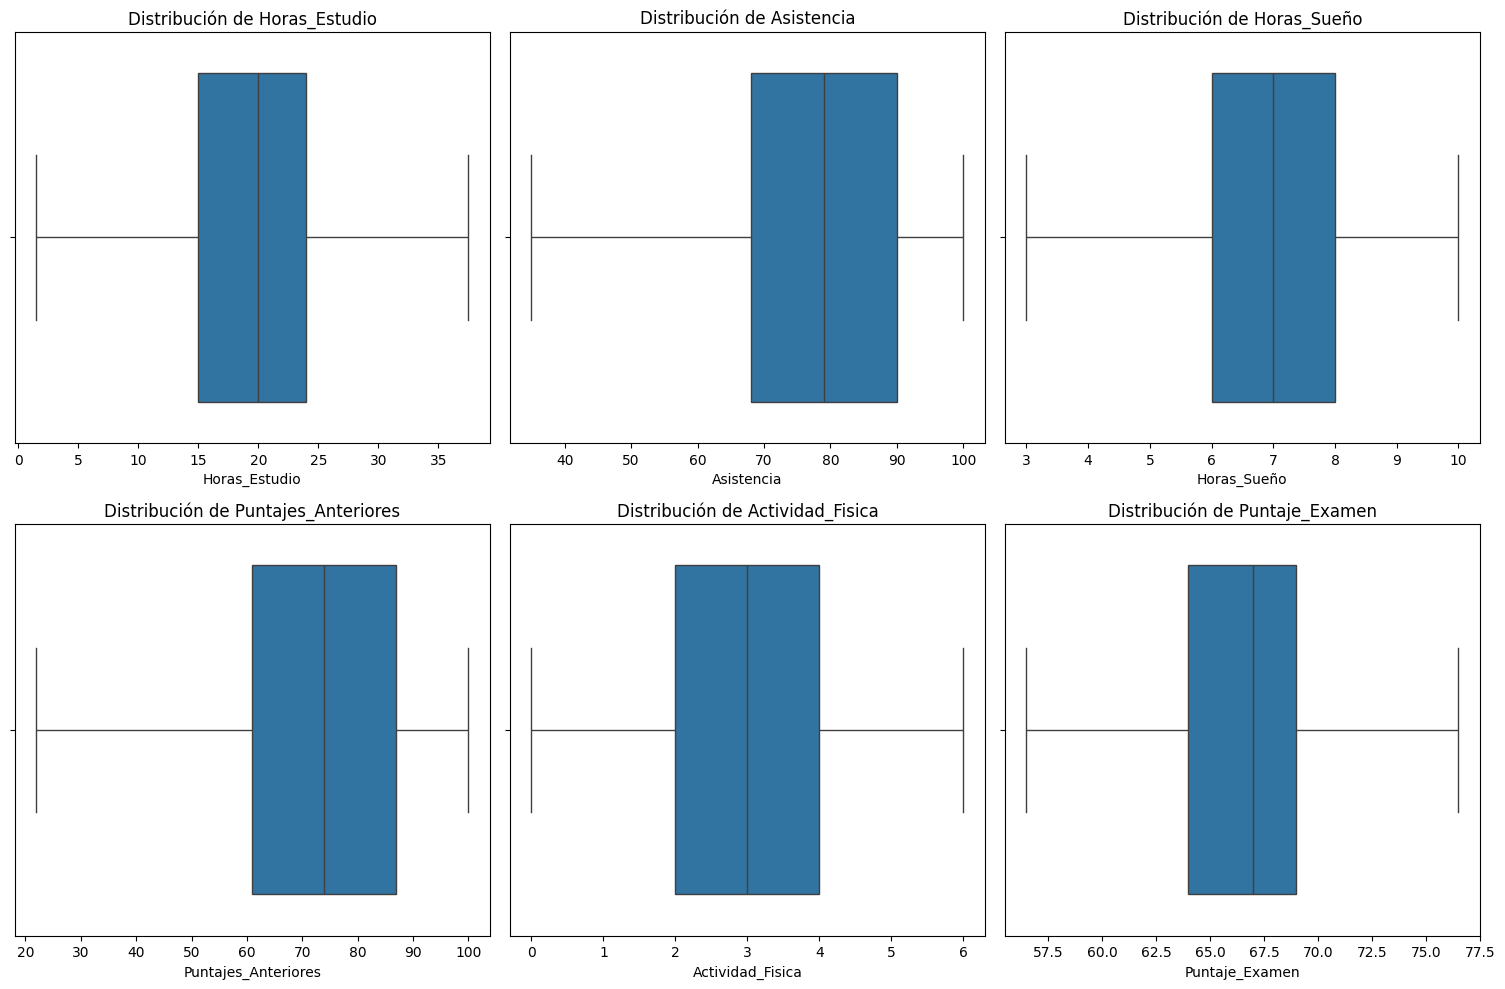

In [32]:


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


In [24]:
df.dtypes

Horas_Estudio                    float64
Asistencia                       float64
Involucramiento_Padres            object
Acceso_a_Recursos                 object
Actividades_Extracurriculares     object
Horas_Sueño                      float64
Puntajes_Anteriores              float64
Nivel_Motivacion                  object
Acceso_a_Internet                 object
Sesiones_Tutorias                 object
Ingreso_Familiar                  object
Calidad_Maestro                   object
Tipo_Escuela                      object
Influencias_Compañeros            object
Actividad_Fisica                 float64
Discapacidad_de_Aprendizaje       object
Nivel_Educacion_Padres            object
Distancia_Hogar                   object
Genero                            object
Puntaje_Examen                   float64
dtype: object

In [55]:

columnas_numericas = [
    'Horas_Estudio', 'Asistencia','Horas_Sueño', 'Puntajes_Anteriores', 
    'Actividad_Fisica', 'Puntaje_Examen'
]
resumen_numerico = df[columnas_numericas].describe().transpose()

print("Resumen de variables numéricas:")
print(resumen_numerico[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])


Resumen de variables numéricas:
                      count       mean        std  min   25%   50%   75%  \
Horas_Estudio        7046.0  18.975163   7.315215  0.0  15.0  20.0  24.0   
Asistencia           7045.0  75.950887  20.754052  0.0  68.0  79.0  90.0   
Horas_Sueño          7053.0   6.672763   2.108808  0.0   6.0   7.0   8.0   
Puntajes_Anteriores  7045.0  71.318808  21.563292  0.0  61.0  74.0  87.0   
Actividad_Fisica     7049.0   2.822812   1.197785  0.0   2.0   3.0   4.0   
Puntaje_Examen       7053.0  63.763363  15.330357  0.0  64.0  67.0  69.0   

                       max  
Horas_Estudio         44.0  
Asistencia           100.0  
Horas_Sueño           10.0  
Puntajes_Anteriores  100.0  
Actividad_Fisica       6.0  
Puntaje_Examen       101.0  


In [21]:
columnas_categoricas = [
    'Involucramiento_Padres', 'Acceso_a_Recursos', 'Actividades_Extracurriculares',
    'Acceso_a_Internet', 'Calidad_Maestro', 'Tipo_Escuela', 
    'Influencias_Compañeros', 'Actividad_Fisica', 'Discapacidad_de_Aprendizaje', 
    'Nivel_Educacion_Padres', 'Genero'
]

print("Frecuencia de variables categóricas:")
for columna in columnas_categoricas:
    print(f"\nFrecuencia para {columna}:")
    print(df[columna].value_counts())


Frecuencia de variables categóricas:

Frecuencia para Involucramiento_Padres:
Involucramiento_Padres
Media          3419
Alta           1925
Baja           1348
Desconocido     352
invalid           9
Name: count, dtype: int64

Frecuencia para Acceso_a_Recursos:
Acceso_a_Recursos
Media          3359
Alta           2001
Baja           1337
Desconocido     352
invalid           4
Name: count, dtype: int64

Frecuencia para Actividades_Extracurriculares:
Actividades_Extracurriculares
Si             3984
No             2712
Desconocido     352
invalid           5
Name: count, dtype: int64

Frecuencia para Acceso_a_Internet:
Acceso_a_Internet
Si             6185
No              512
Desconocido     352
invalid           4
Name: count, dtype: int64

Frecuencia para Calidad_Maestro:
Calidad_Maestro
Media          3965
Alta           1988
Baja            662
Desconocido     433
invalid           5
Name: count, dtype: int64

Frecuencia para Tipo_Escuela:
Tipo_Escuela
Publica        4657
Privada  

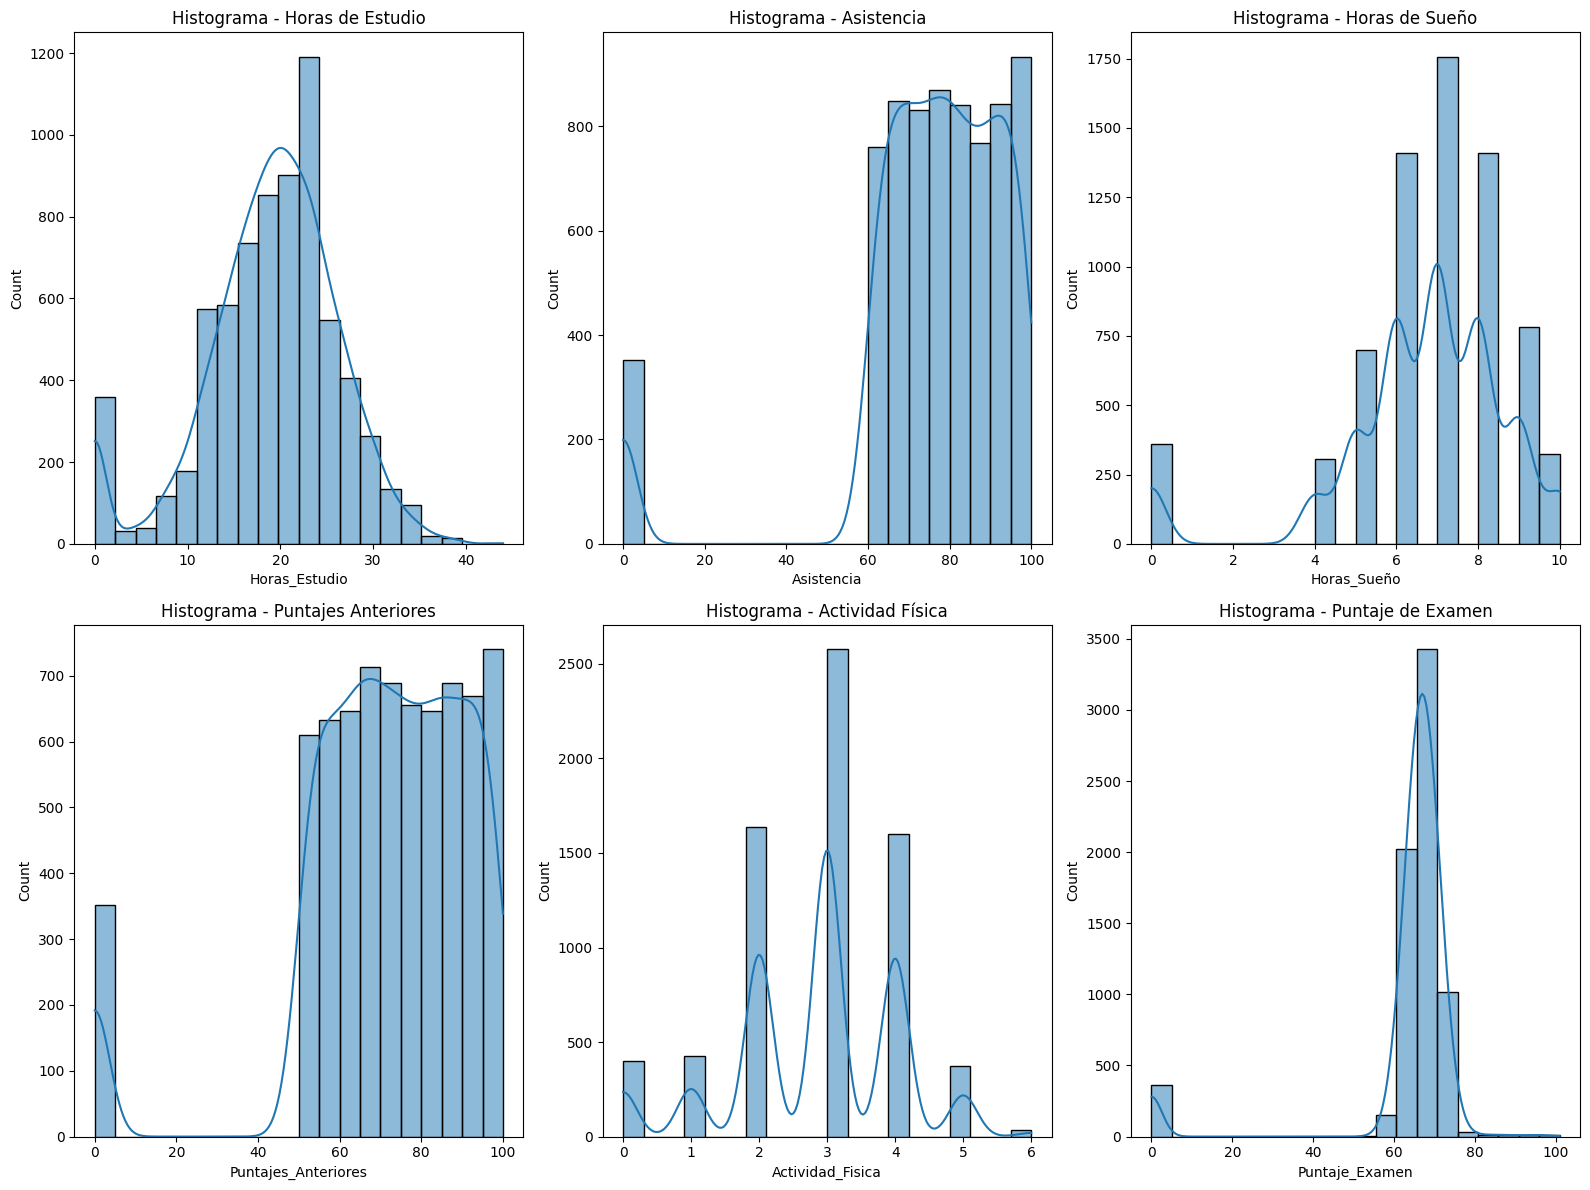

In [12]:

columnas_numericas = ['Horas_Estudio', 'Asistencia', 'Horas_Sueño', 
                     'Puntajes_Anteriores', 'Actividad_Fisica', 'Puntaje_Examen']

plt.figure(figsize=(16, 12))

# Histograma
plt.subplot(2, 3, 1)
sns.histplot(df['Horas_Estudio'], kde=True, bins=20)
plt.title('Histograma - Horas de Estudio')

plt.subplot(2, 3, 2)
sns.histplot(df['Asistencia'], kde=True, bins=20)
plt.title('Histograma - Asistencia')

plt.subplot(2, 3, 3)
sns.histplot(df['Horas_Sueño'], kde=True, bins=20)
plt.title('Histograma - Horas de Sueño')

plt.subplot(2, 3, 4)
sns.histplot(df['Puntajes_Anteriores'], kde=True, bins=20)
plt.title('Histograma - Puntajes Anteriores')

plt.subplot(2, 3, 5)
sns.histplot(df['Actividad_Fisica'], kde=True, bins=20)
plt.title('Histograma - Actividad Física')

plt.subplot(2, 3, 6)
sns.histplot(df['Puntaje_Examen'], kde=True, bins=20)
plt.title('Histograma - Puntaje de Examen')

plt.tight_layout()
plt.show()



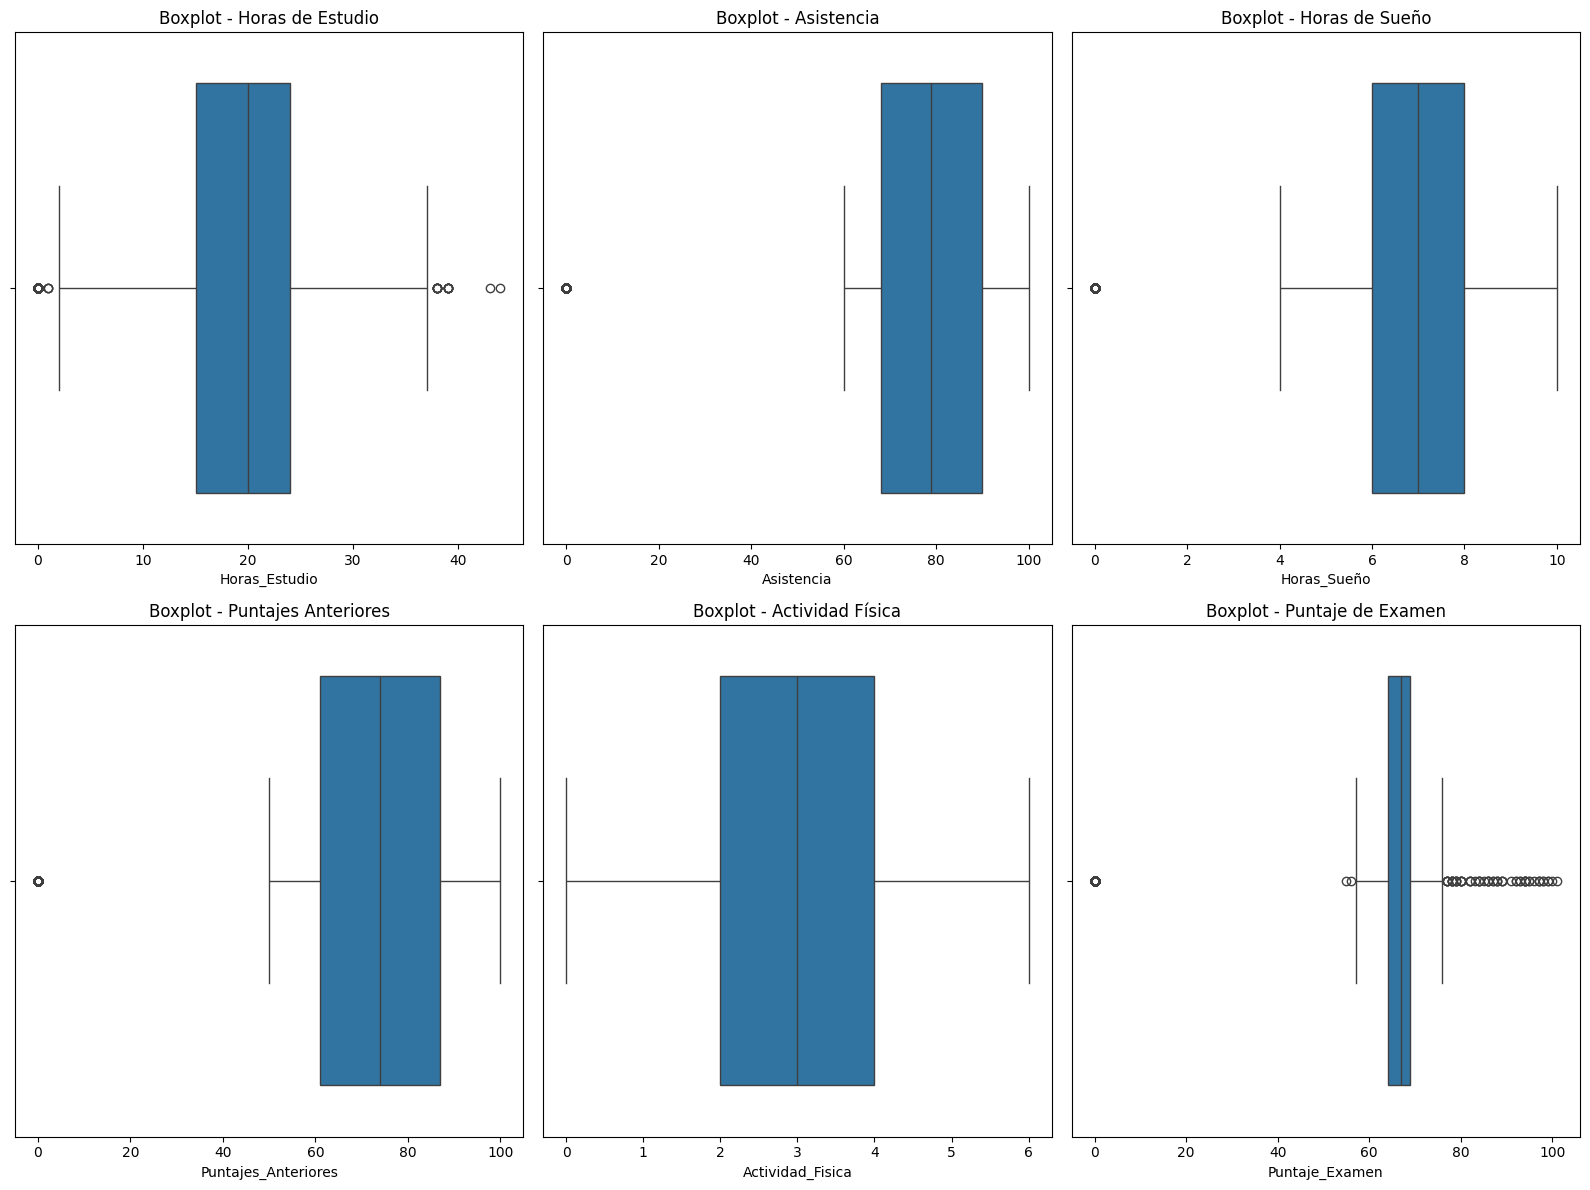

In [14]:
# Boxplots
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['Horas_Estudio'])
plt.title('Boxplot - Horas de Estudio')

plt.subplot(2, 3, 2)
sns.boxplot(x=df['Asistencia'])
plt.title('Boxplot - Asistencia')

plt.subplot(2, 3, 3)
sns.boxplot(x=df['Horas_Sueño'])
plt.title('Boxplot - Horas de Sueño')

plt.subplot(2, 3, 4)
sns.boxplot(x=df['Puntajes_Anteriores'])
plt.title('Boxplot - Puntajes Anteriores')

plt.subplot(2, 3, 5)
sns.boxplot(x=df['Actividad_Fisica'])
plt.title('Boxplot - Actividad Física')

plt.subplot(2, 3, 6)
sns.boxplot(x=df['Puntaje_Examen'])
plt.title('Boxplot - Puntaje de Examen')

plt.tight_layout()
plt.show()



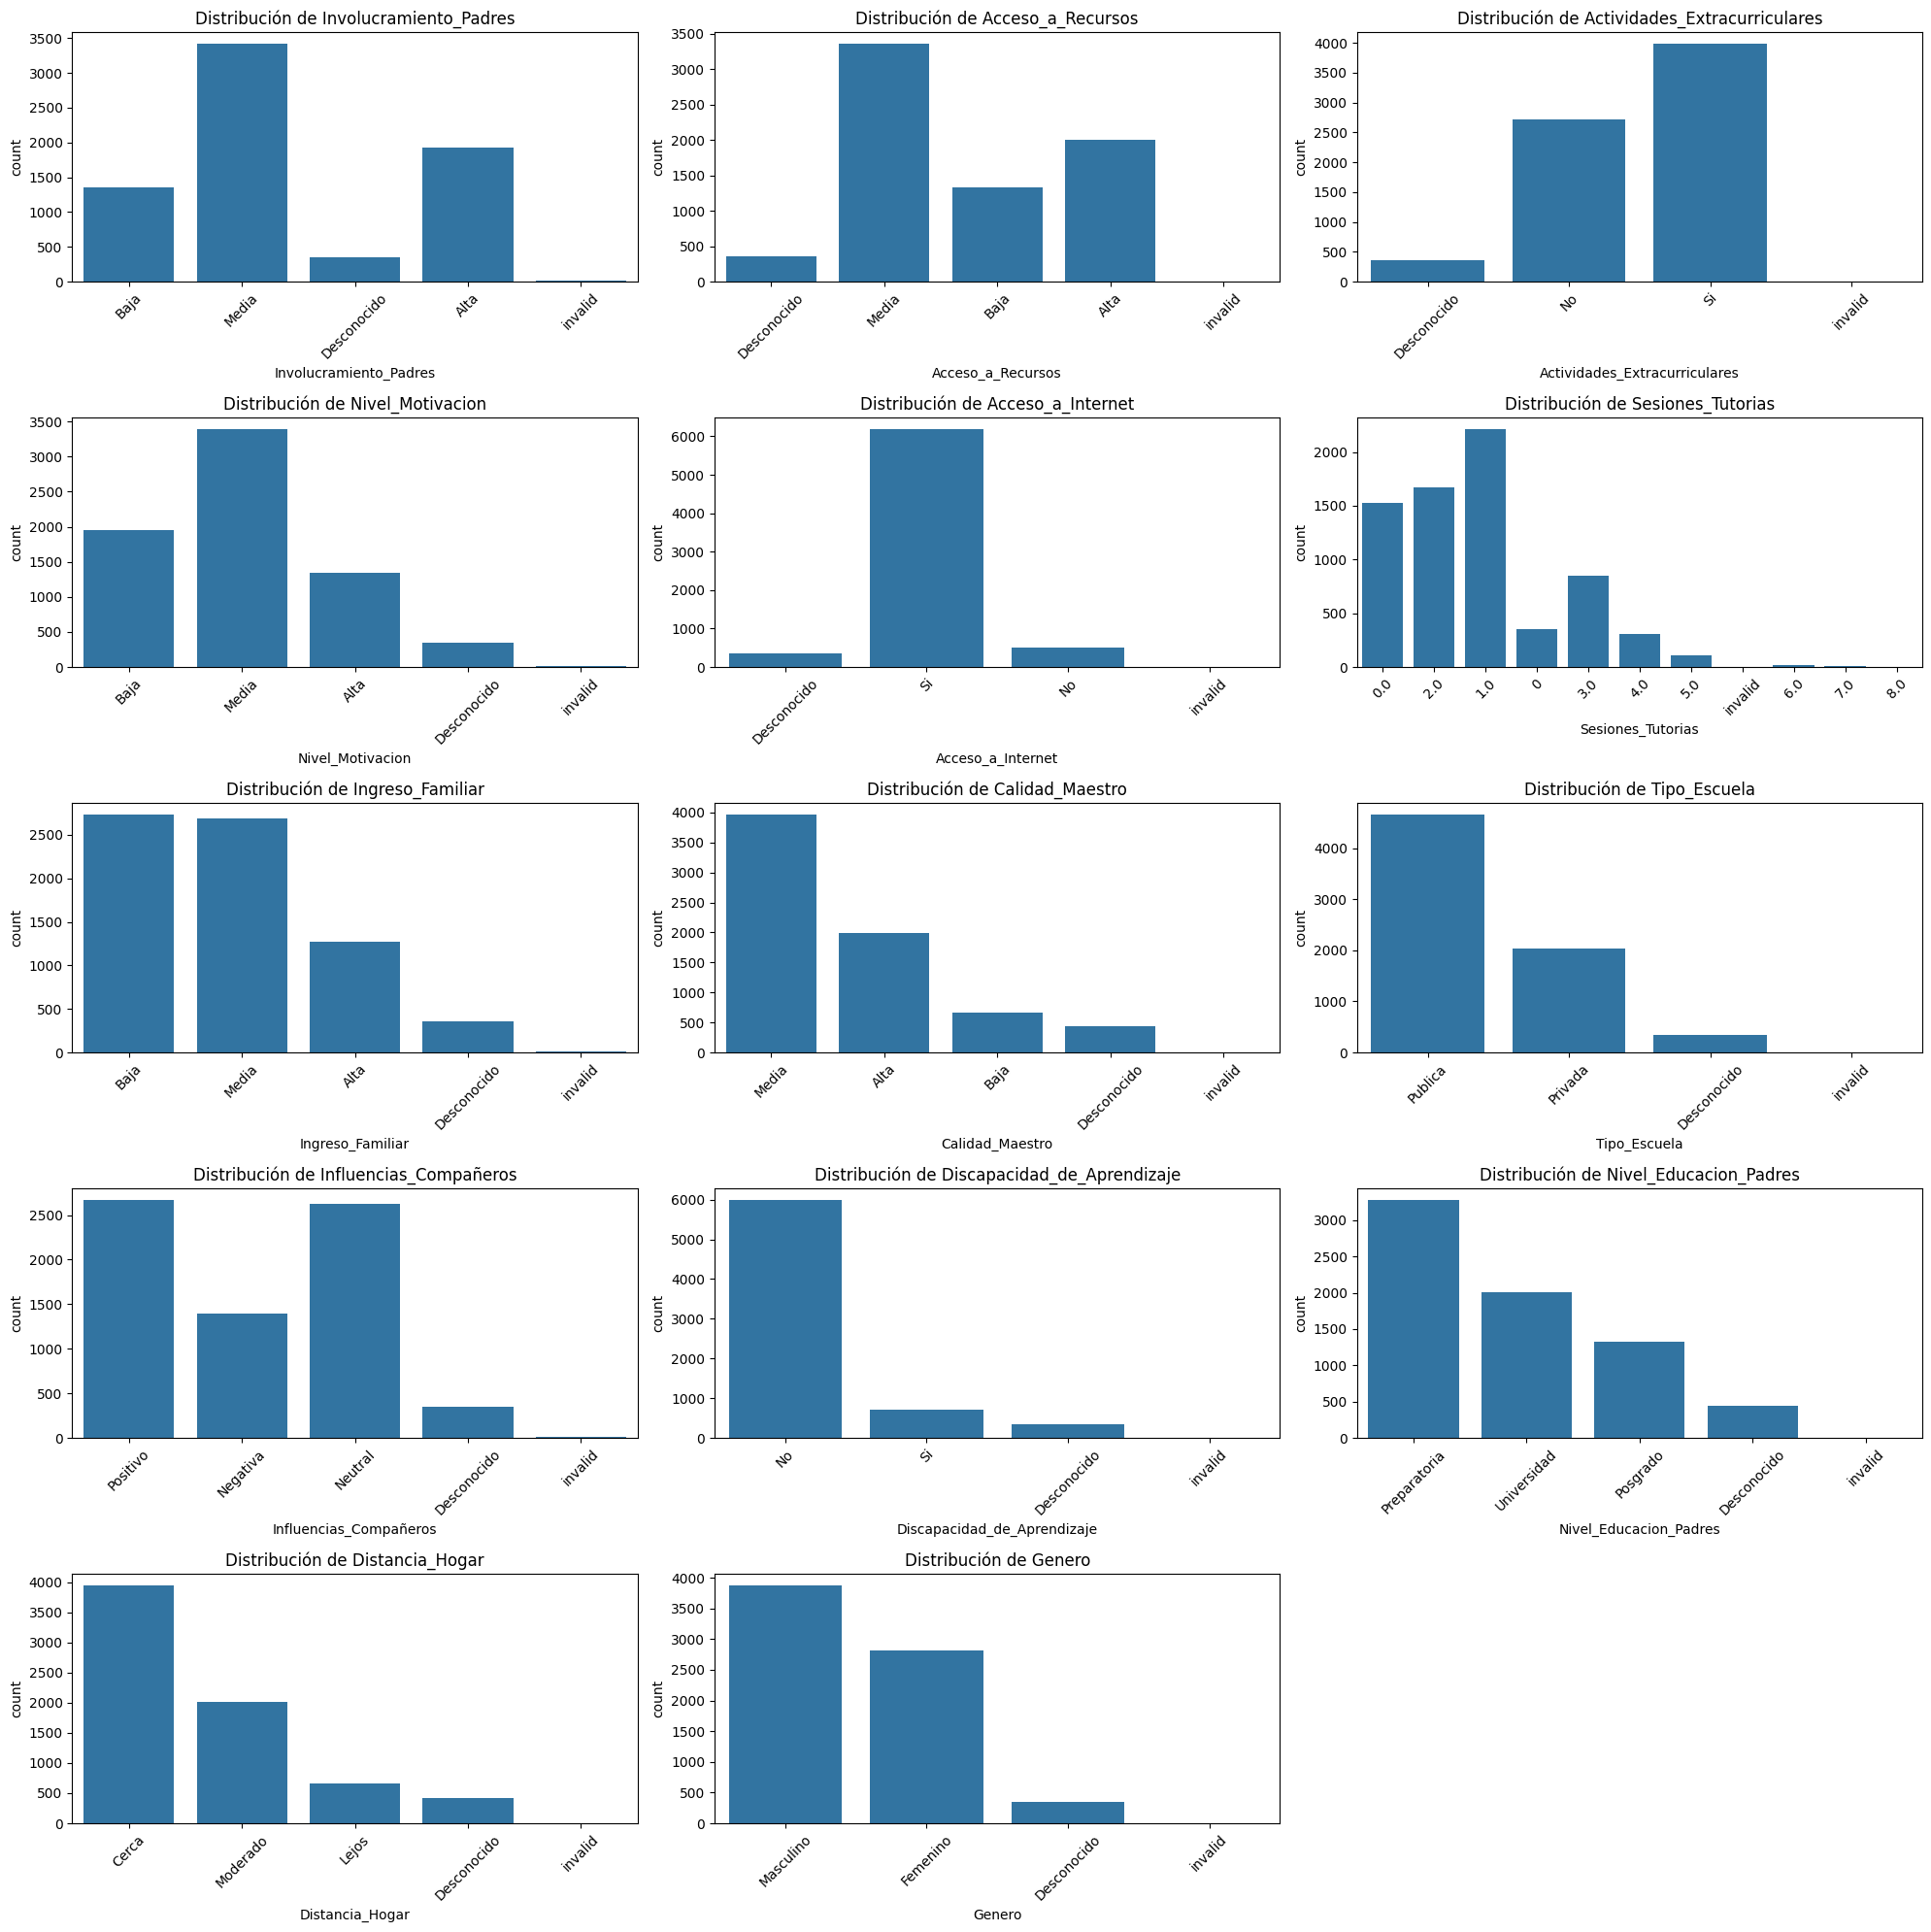

In [15]:
columnas_categoricas = [
    'Involucramiento_Padres', 'Acceso_a_Recursos', 'Actividades_Extracurriculares', 
    'Nivel_Motivacion', 'Acceso_a_Internet', 'Sesiones_Tutorias', 'Ingreso_Familiar', 
    'Calidad_Maestro', 'Tipo_Escuela', 'Influencias_Compañeros', 'Discapacidad_de_Aprendizaje', 
    'Nivel_Educacion_Padres', 'Distancia_Hogar', 'Genero'
]

plt.figure(figsize=(20, 20))

for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(5, 3, i) 
    sns.countplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()



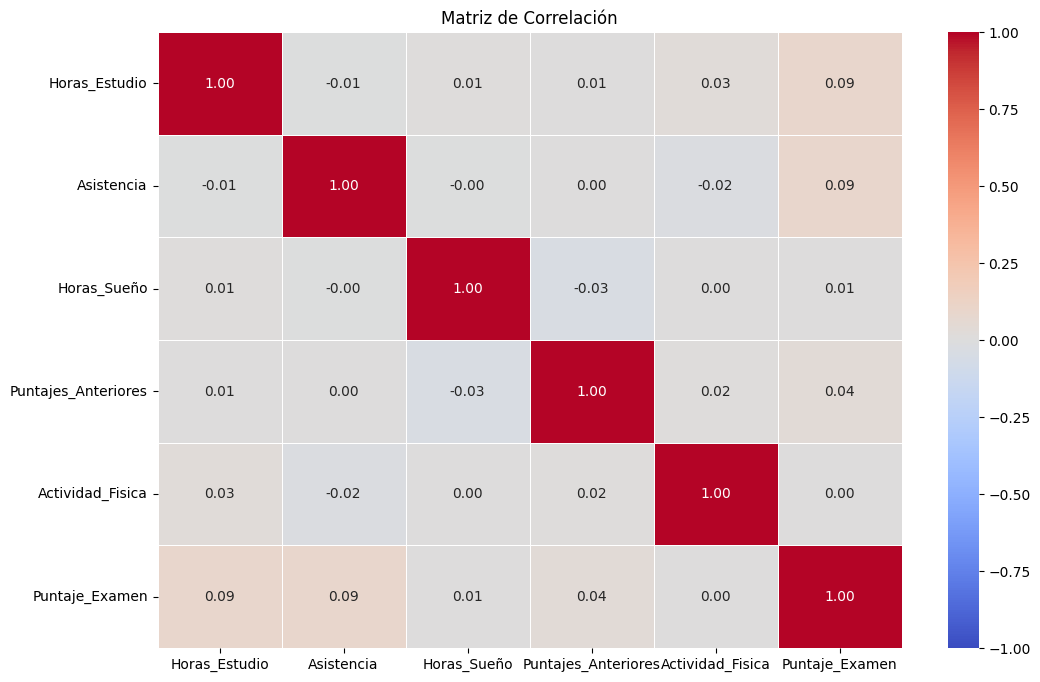

In [24]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


In [41]:
# Función para detectar outliers utilizando el rango intercuartílico (IQR)
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

# Detectar outliers en una columna, por ejemplo 'Horas_Sueño'
outliers = detectar_outliers(df, 'Horas_Sueño')
print(outliers)


      Horas_Estudio  Asistencia Involucramiento_Padres Acceso_a_Recursos  \
9              23.0        98.0                  Media             Media   
11             17.0        97.0                  Media              Alta   
26             13.0        91.0                   Baja             Media   
45             16.0        70.0                  Media             Media   
48             22.0        86.0                   Baja             Media   
...             ...         ...                    ...               ...   
6945           26.0        98.0                   Baja              Alta   
6957           33.0        92.0                   Alta              Alta   
7021           19.0        70.0                   Alta             Media   
7034           21.0         0.0                  Media              Baja   
7042           20.0        98.0                   Baja              Alta   

     Actividades_Extracurriculares  Horas_Sueño  Puntajes_Anteriores  \
9              

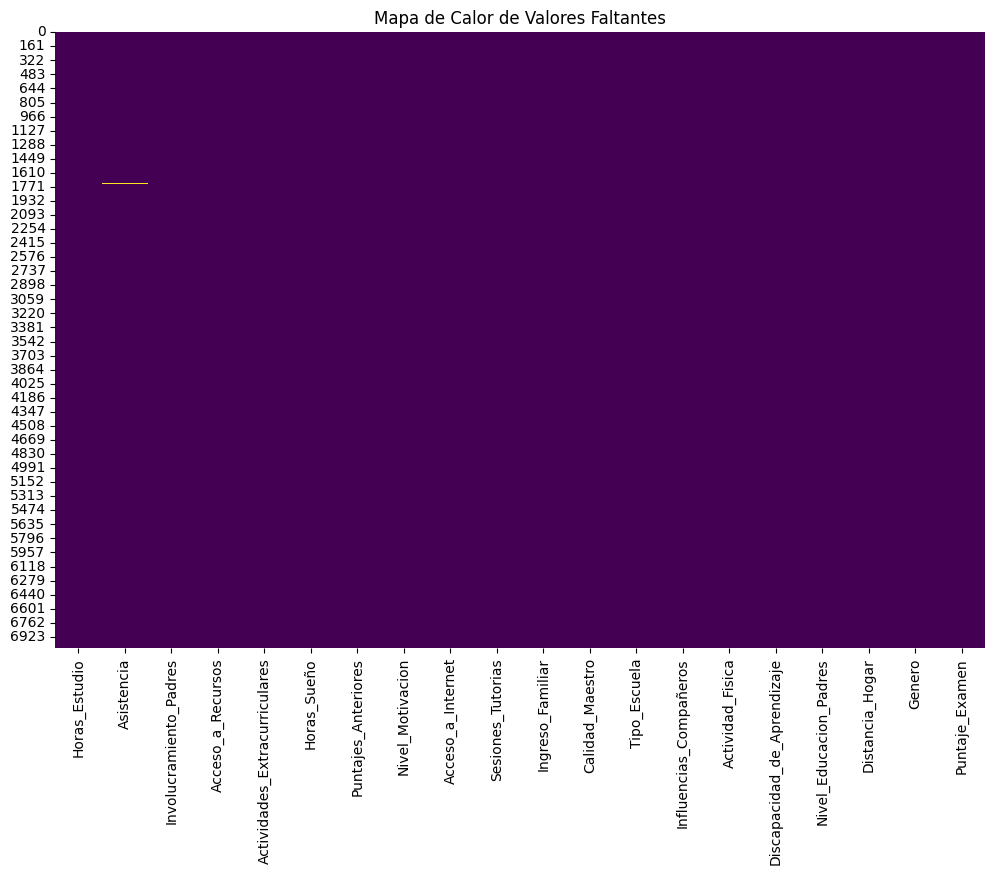

In [ ]:
# Visualizar los valores faltantes con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()
